In [2]:
import pandas as pd

train_data = pd.read_csv('data/train.csv')
submission_data = pd.read_csv("data/sample_submission.csv")
test_data = pd.read_csv("data/test.csv")

print("Training Data: ")
display(train_data)

Training Data: 


,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136424,136424,M22284,M,300.1,311.4,1530,37.5,210,0,0,0,0,0,0
136425,136425,H38017,H,297.5,308.5,1447,49.1,2,0,0,0,0,0,0
136426,136426,L54690,L,300.5,311.8,1524,38.5,214,0,0,0,0,0,0
136427,136427,L53876,L,301.7,310.9,1447,46.3,42,0,0,0,0,0,0


### Training Data

In [3]:
print("Submission Data:" )
display(submission_data)


Submission Data:


,id,Machine failure
0,136429,0.5
1,136430,0.5
2,136431,0.5
3,136432,0.5
4,136433,0.5
...,...,...
90949,227378,0.5
90950,227379,0.5
90951,227380,0.5
90952,227381,0.5


### Submission Data

In [4]:
print("Test Data: ")
display(test_data)

Test Data: 


,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
90949,227378,L51130,L,302.3,311.4,1484,40.4,15,0,0,0,0,0
90950,227379,L47783,L,297.9,309.8,1542,33.8,31,0,0,0,0,0
90951,227380,L48097,L,295.6,306.2,1501,41.4,187,0,0,0,0,0
90952,227381,L48969,L,298.1,307.8,1534,40.3,69,0,0,0,0,0


### Test Data

### we notice that machines of type L has 1,6% chance of failure

In [6]:
Machine_L = train_data.loc[train_data.Type == "L"]["Machine failure"]
rate_L = sum(Machine_L)/len(Machine_L)
print(rate_L)

0.0167271430668876


### we notice that machines of type M has 4,9% chance of failure

In [7]:
Machine_M = train_data.loc[train_data.Type == "M"]["Machine failure"]
rate_M = sum(Machine_L)/len(Machine_M)
print(rate_M)

0.049608111470515054


### we notice that machines of type H has 1,3% chance of failure

In [8]:
Machine_H = train_data.loc[train_data.Type == "H"]["Machine failure"]
rate_H = sum(Machine_H)/len(Machine_H)
print(rate_H)

0.013000112069931638




#### the type of the machine wasnt a good guess but still , we clearly see that machines of type M fail the more than the other 2

## we notice that the machines with RPM < 1200 are likely to fail 

In [10]:
rpm = train_data.loc[train_data["Rotational speed [rpm]"] < 1400]["Machine failure"]
rate_rpm = sum(rpm)/len(rpm)
print(f"Failure rate for machines with RPM < 1400: {rate_rpm:.3f}")


Failure rate for machines with RPM < 1400: 0.070


### 30% of machines with rpm < 1200 failed

In [13]:
rpm = train_data.loc[train_data["Rotational speed [rpm]"] < 1200]["Machine failure"]
rate_rpm = sum(rpm)/len(rpm)
print(f"Failure rate for machines with RPM < 1200: {rate_rpm:.3f}")

Failure rate for machines with RPM < 1300: 0.300


In [ ]:
rpm = train_data.loc[train_data["Rotational speed [rpm]"] < 1200]["Machine failure"]
rate_rpm = sum(rpm)/len(rpm)
print(f"Failure rate for machines with RPM < 1200: {rate_rpm:.3f}")

In [23]:
condition1 = train_data.loc[(train_data["Rotational speed [rpm]"] < 1200) & (train_data["Torque [Nm]"] > 40)]["Machine failure"]
rate1 = sum(condition1)/len(condition1)
print(f"Failure rate for machines with RPM < 1400 and Torque > 40: {rate:.3f}")


Failure rate for machines with RPM < 1400 and Torque > 40: 0.429


## we can see that the condtion3 is the one with the highest rate

In [ ]:
# 8,9%
condition2 = train_data.loc[(train_data["Torque [Nm]"] > 50) &
                          (train_data["Process temperature [K]"] > 311)]["Machine failure"]
rate2 = sum(condition2)/len(condition2)
print(rate2)

# 46%
condition3 = train_data.loc[(train_data["Rotational speed [rpm]"] < 1300) &
                          (train_data["Tool wear [min]"] > 200)]["Machine failure"]
rate3 = sum(condition3)/len(condition3)
print(rate3)

# 2,3%
condition4 = train_data.loc[(train_data["Process temperature [K]"] - train_data["Air temperature [K]"] > 10) & 
                          (train_data["Torque [Nm]"] > 45)]["Machine failure"]
rate4 = sum(condition4)/len(condition4)
print(rate4)

0.08903924221921515
0.46226415094339623
0.02377000910112961


# final model ( my creation first try ) :

In [27]:
from sklearn.ensemble import RandomForestClassifier

y = train_data["Machine failure"]

features = ["Rotational speed [rpm]", "Tool wear [min]", "Air temperature [K]", "Torque [Nm]"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=200, max_depth=7, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'id': test_data.id, 'Machine failure': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


# Preplexity Model Try :

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler


In [29]:
train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

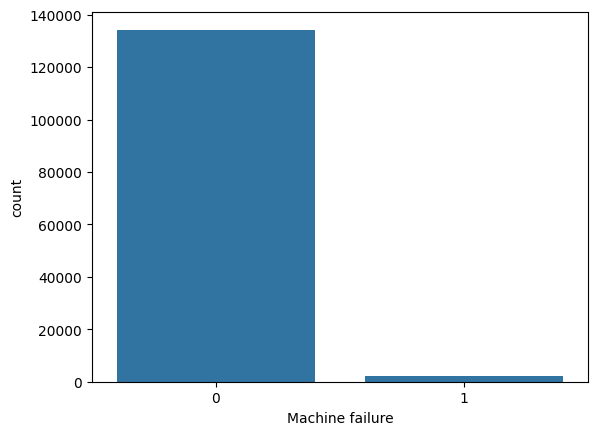

In [32]:
print(train_data.info())
print(train_data.describe())
sns.countplot(x='Machine failure', data=train_data)
plt.show()

In [33]:
train_data = pd.get_dummies(train_data, columns=['Product ID', 'Type'], drop_first=True)
test_data = pd.get_dummies(test_data, columns=['Product ID', 'Type'], drop_first=True)


## Normalize or standardize numerical features to improve model performance

In [34]:
scaler = StandardScaler()
features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
train_data[features] = scaler.fit_transform(train_data[features])
test_data[features] = scaler.transform(test_data[features])

In [35]:
X = train_data.drop(['Machine failure', 'id', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'], axis=1)
y = train_data['Machine failure']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
model = RandomForestClassifier(n_estimators=200, max_depth=7, random_state=1)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, n_estimators=200, random_state=1)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     26848
           1       0.00      0.00      0.00       438

    accuracy                           0.98     27286
   macro avg       0.49      0.50      0.50     27286
weighted avg       0.97      0.98      0.98     27286



C:\Users\firefly\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\firefly\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\firefly\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classi

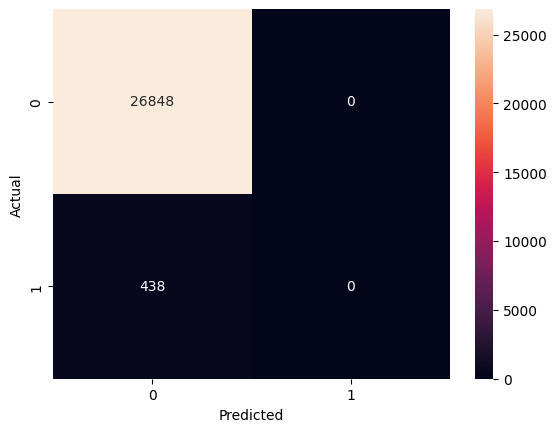

In [37]:
y_pred = model.predict(X_val)
print(classification_report(y_val, y_pred))
sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
test_features = test_data.drop(['id', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'], axis=1)
test_features = test_features.reindex(columns=X.columns, fill_value=0)
predictions = model.predict(test_features)

In [40]:
output = pd.DataFrame({'id': test_data['id'], 'Machine failure': predictions})
output.to_csv('submission1.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


# Mines Better mais roh brk